Warning in <TCanvas::Constructor>: Deleting canvas with same name: pval
Info in <TCanvas::Print>: png file pval.png has been created


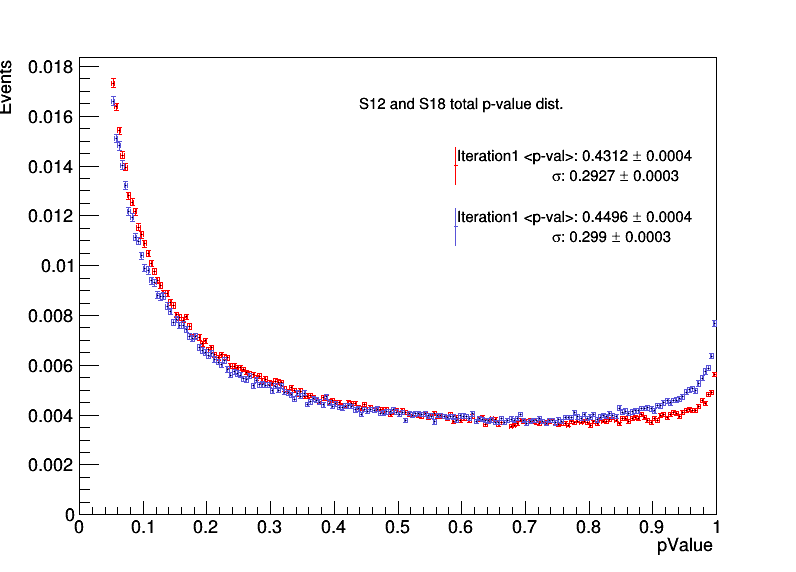

In [10]:
# Juoyer ROOT import 
import sys
sys.path.append("/usr/local/Cellar/root/6.14.04_2/lib/root")
# ROOT includes 
from ROOT import TH1D, TH2D, TF1, TCanvas, TFile, gStyle, TLegend, gROOT

scr_nominal = "/Users/gleb/software/alignTrack/mpIIDESY/15922/"
scr_shift = "/Users/gleb/software/alignTrack/mpIIDESY/15922_M0_fixed_Iter2/"

colorHisto = [2, 9] # red, blue 
legendName = ["Iteration1", "Iteration2"]
stateN = 2
stationN = 2

#Open TFiles (looped over i_state)
scrFile_nominal_s12 = TFile.Open(scr_nominal+"S12/gm2tracker_ana.root")
scrFile_shift_s12 = TFile.Open(scr_shift+"S12/gm2tracker_ana.root")
scrFile_nominal_s18 = TFile.Open(scr_nominal+"S18/gm2tracker_ana.root")
scrFile_shift_s18 = TFile.Open(scr_shift+"S18/gm2tracker_ana.root")
fileName = [scrFile_nominal_s12, scrFile_shift_s12, scrFile_nominal_s18, scrFile_shift_s18] # nominal (0) and shift (1)
plotPath = "TrackSummary/FitResults/pValues" 

###Pvalue plots for each station 
i_plot = 0 
for i_station in range(0, stationN):

    canvas_p = TCanvas(str(i_station), " ", 800, 600)
    legend =  TLegend(0.57, 0.87, 0.59, 0.55)
    
    for i_state in rag
   
    #Get the plot 
    h_pval_nominal = fileName[0].Get(str(plotPath))
    h_pval_shift = fileName[1].Get(str(plotPath))
    norm_nominal = h_pval_nominal.GetEntries()
    norm_shift = h_pval_shift.GetEntries()
    h_pval_nominal.Scale(1/norm_nominal) # normalise the histo
    h_pval_shift.Scale(1/norm_shift) # normalise the histo

    mean_nominal = round(h_pval_nominal.GetMean() , 4)
    mean_error_nominal = round(h_pval_nominal.GetMeanError() , 4)
    sd_nominal = round(h_pval_nominal.GetRMS() , 4)
    sd_error_nominal = round(h_pval_nominal.GetRMSError() , 4)

    mean_shfit = round(h_pval_shift.GetMean() , 4)
    mean_error_shift = round(h_pval_shift.GetMeanError() , 4)
    sd_shift = round(h_pval_shift.GetRMS() , 4)
    sd_error_shift = round(h_pval_shift.GetRMSError() , 4)

    #Draw 
    h_pval_nominal.SetLineColor(colorHisto[0])
    h_pval_nominal.Draw("E1")
    h_pval_shift.SetLineColor(colorHisto[1])
    h_pval_shift.Draw("E1 same")

    #take care of the legend
    legenValue1_n = str(legendName[0])+" <p-val>: "+str(mean_nominal)+" #pm "+str(mean_error_nominal) 
    legenValue2_n = "#sigma: "+str(sd_nominal)+" #pm "+str(sd_error_nominal)
    legend.AddEntry(h_pval_nominal,"#splitline{"+str(legenValue1_n)+"}{                   "+str(legenValue2_n)+"}","LE") # make appropriate spacing 
    legenValue1_s = str(legendName[0])+" <p-val>: "+str(mean_shfit)+" #pm "+str(mean_error_shift) 
    legenValue2_s = "#sigma: "+str(sd_shift)+" #pm "+str(sd_error_shift)
    legend.AddEntry(h_pval_shift,"#splitline{"+str(legenValue1_s)+"}{                   "+str(legenValue2_s)+"}","LE") # make appropriate spacing 
    legend.SetTextSize(.028)
    legend.Draw("same")
    
#Do some final massagin and save to a filer
legend.SetHeader("S12 and S18 total p-value dist.", "C"); # option "C" allows to center the header
gStyle.SetOptStat(0)
gStyle.SetOptFit(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetLegendTextSize(0.023)
canvas_p.Draw()
canvas_p.Print("pval.png")